In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Lendo CSV

In [2]:
# Lendo csv
df = pd.read_csv("casos_attr_2017.csv")

In [3]:
# convertando booleanos para inteiros
bool_columns = [u'penalty_AGP', u'penalty_BGK', u'penalty_AVJLP', u'penalty_BGP',
                u'basic payment', u'penalty_AJLP', u'greening', u'penalty_AVGP',
                u'penalty_C16', u'penalty_B16', u'penalty_AVBP', u'selected_manually',
                u'penalty_C9', u'penalty_C4', u'penalty_B5', u'selected_random',
                u'penalty_AUVP', u'penalty_AVUVP', u'rejected', u'penalty_V5',
                u'penalty_BGKV', u'penalty_B5F', u'selected_risk', u'penalty_GP1',
                u'small farmer', u'penalty_CC', u'penalty_JLP5', u'penalty_JLP6',
                u'penalty_JLP7', u'penalty_JLP1', u'penalty_JLP2', u'penalty_JLP3',
                u'penalty_ABP', u'penalty_B6', u'penalty_B4', u'redistribution',
                u'penalty_B2', u'penalty_B3', u'young farmer']
df[bool_columns] *= 1

# removendo colunas do tipo textual
string_columns = [u'applicant', u'concept:name', u'application', u'department',
                  u'start_time', u'identity:id', u'end_time']
df = df.drop(string_columns, axis=1)

### Descrevendo atributos

In [4]:
# total de aplicações
n_rows = df.shape[0]
# total de aplicações com 'finish payment'
n_rows_f_p = df[df['finish payment'] == 1].shape[0]
# lista de atributos
attr_names = list(df.columns.values)

df_f_p = df[df['finish payment'] == 1]

# criando tabela
table = pd.DataFrame(data={u"Coluna" : attr_names})
table[u'Total de val. únicos != 0'] = [len(list(df[df[k] > .0][k])) for k in df.columns.values]
table[u" % "] = [(float(v) / n_rows) * 100 for v in df.count()]
table[u"Total de val. únicos != 0' c/ 'finish payment'"] = [len(list(df_f_p[df_f_p[k] > .0][k])) for k in df.columns.values]
table[u" %  "] = [(float(v) / n_rows_f_p) * 100 for v in df_f_p.count()]

# ordenando pelo %
table = table.sort_values([u" %  "])

In [5]:
table.head(15)

,Coluna,Total de val. únicos != 0,%,Total de val. únicos != 0' c/ 'finish payment',%
40,amount_applied1,38,0.261943,0,0.0
31,payment_actual1,5,0.261943,0,0.0
28,penalty_amount1,28,0.261943,0,0.0
29,penalty_amount0,2961,100.000000,2894,100.0
30,rejected,66,100.000000,0,100.0
32,penalty_AVUVP,0,100.000000,0,100.0
33,penalty_CC,404,100.000000,395,100.0
34,penalty_B3,0,100.000000,0,100.0
35,delta_time,14507,100.000000,14356,100.0
36,penalty_BGKV,15,100.000000,14,100.0


### Lista de atributos sem valores para o ano

In [6]:
# atributos nulos para ambos os tipos
table_0 =  table[table[u'Total de val. únicos != 0'] == 0]
table_0

,Coluna,Total de val. únicos != 0,%,Total de val. únicos != 0' c/ 'finish payment',%
32,penalty_AVUVP,0,100.0,0,100.0
34,penalty_B3,0,100.0,0,100.0
48,penalty_B6,0,100.0,0,100.0
49,penalty_B4,0,100.0,0,100.0
4,penalty_AVJLP,0,100.0,0,100.0
12,penalty_AVGP,0,100.0,0,100.0
14,penalty_B16,0,100.0,0,100.0
15,penalty_AVBP,0,100.0,0,100.0
21,penalty_C4,0,100.0,0,100.0
22,penalty_V5,0,100.0,0,100.0


In [7]:
# atributos nulos para as aplicações com o 'finish payment'
table_01 =  table[table[u"Total de val. únicos != 0' c/ 'finish payment'"] == 0]
table_01

,Coluna,Total de val. únicos != 0,%,Total de val. únicos != 0' c/ 'finish payment',%
40,amount_applied1,38,0.261943,0,0.0
31,payment_actual1,5,0.261943,0,0.0
28,penalty_amount1,28,0.261943,0,0.0
30,rejected,66,100.000000,0,100.0
32,penalty_AVUVP,0,100.000000,0,100.0
34,penalty_B3,0,100.000000,0,100.0
48,penalty_B6,0,100.000000,0,100.0
49,penalty_B4,0,100.000000,0,100.0
4,penalty_AVJLP,0,100.000000,0,100.0
12,penalty_AVGP,0,100.000000,0,100.0


## Listando apenas atributos "válidos"

In [8]:
atributos = list(table[table[u"Total de val. únicos != 0' c/ 'finish payment'"] > 0][u'Coluna'])

new_df = df[atributos]

# total de aplicações
n_rows = new_df.shape[0]
# total de aplicações com 'finish payment'
n_rows_f_p = new_df[new_df['finish payment'] == 1].shape[0]

df_f_p = new_df[new_df['finish payment'] == 1]

# criando tabela
table_2 = pd.DataFrame(data={u"Coluna" : atributos})
table_2[u'Total de val. únicos != 0'] = [len(list(new_df[new_df[k] > .0][k])) for k in atributos]
table_2[u" % "] = [(float(v) / n_rows) * 100 for v in new_df.count()]
table_2[u'Avg'] = [new_df[new_df[k] > .0][k].mean() for k in atributos]
table_2[u'Max'] = [new_df[new_df[k] > .0][k].max() for k in atributos]
table_2[u'Min'] = [new_df[new_df[k] > .0][k].min() for k in atributos]
table_2[u"Total de val. únicos != 0' c/ 'finish payment'"] = [len(list(df_f_p[df_f_p[k] > .0][k])) for k in atributos]
table_2[u" %  "] = [(float(v) / n_rows_f_p) * 100 for v in df_f_p.count()]
table_2[u'Avg '] = [df_f_p[df_f_p[k] > .0][k].mean() for k in atributos]
table_2[u'Max '] = [df_f_p[df_f_p[k] > .0][k].max() for k in atributos]
table_2[u'Min '] = [df_f_p[df_f_p[k] > .0][k].min() for k in atributos]
table_2[u'Var '] = [df_f_p[df_f_p[k] > .0][k].var() for k in atributos]

# ordenando pela variiancia
table_2 = table_2.sort_values([u'Var '], ascending=False)
table_2.head(200)

,Coluna,Total de val. únicos != 0,%,Avg,Max,Min,Total de val. únicos != 0' c/ 'finish payment',%,Avg,Max,Min,Var
38,amount_applied0,14456,100.0,23907.463522,584880.240000,351.780000,14356,100.0,23812.395541,584880.240000,351.780000,2.716774e+09
12,payment_actual0,14500,100.0,23677.885093,584829.030000,12.810000,14356,100.0,23663.202191,584829.030000,166.170000,2.700140e+09
0,penalty_amount0,2961,100.0,583.638234,37298.680000,0.010000,2894,100.0,561.798300,37298.680000,0.010000,2.609773e+06
32,area,14400,100.0,68.537834,576.070500,1.159100,14281,100.0,68.422892,576.070500,1.159100,7.295213e+03
19,tot_events,14507,100.0,58.772317,2973.000000,31.000000,14356,100.0,58.514976,2973.000000,33.000000,1.955015e+03
18,number_parcels,14400,100.0,18.805556,103.000000,1.000000,14267,100.0,18.784047,103.000000,1.000000,3.422530e+02
2,delta_time,14507,100.0,251.694148,332.000000,113.000000,14356,100.0,251.794511,332.000000,210.000000,1.510671e+02
36,cross_compliance,415,100.0,5.703614,100.000000,1.000000,405,100.0,5.456790,66.000000,1.000000,4.721904e+01
31,avg_event_interval,14507,100.0,0.234135,12.651064,0.127273,14356,100.0,0.233003,12.651064,0.127273,3.374507e-02
33,risk_factor,14507,100.0,1.000000,1.000000,1.000000,14356,100.0,1.000000,1.000000,1.000000,0.000000e+00


### Verificando a Importância das variáveis considerando apenas os atributos 'válidos'

In [9]:
# removendo colunas com NAN
new_df = new_df.dropna(axis=1, how='any')

# movendo coluna 'finish payment' para o final
cols = list(new_df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('finish payment')) #Remove b from list
new_df = new_df[cols + ['finish payment']]

# Copiando os dados do csv
data = new_df.values.copy()

# Separando atributos de classes
x = data[:, :-1]  # x tem apenas valores entre a primeira e penúltima coluna
y = data[:, -1]  # y tem os valores da última coluna
y = [1 if i else 0 for i in y]

# 70% dos dados serão utilizados para treinamento e 30% para o teste
# A divisão será estratificada, serão mantidas as proporções de spam e não spam em cada grupo
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.7, stratify=y)

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
x_treino.shape

(10154, 40)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Classificando com uma floresta árvores de decisão
cls_rf = RandomForestClassifier(n_estimators=100)
cls_rf.fit(x_treino, y_treino)
y_pred_rf = cls_rf.predict(x_teste)

print "Floresta árvores de decisão"
print classification_report(y_pred_rf, y_teste)

Floresta árvores de decisão
             precision    recall  f1-score   support

          0       0.36      1.00      0.52        16
          1       1.00      0.99      1.00      4337

avg / total       1.00      0.99      0.99      4353



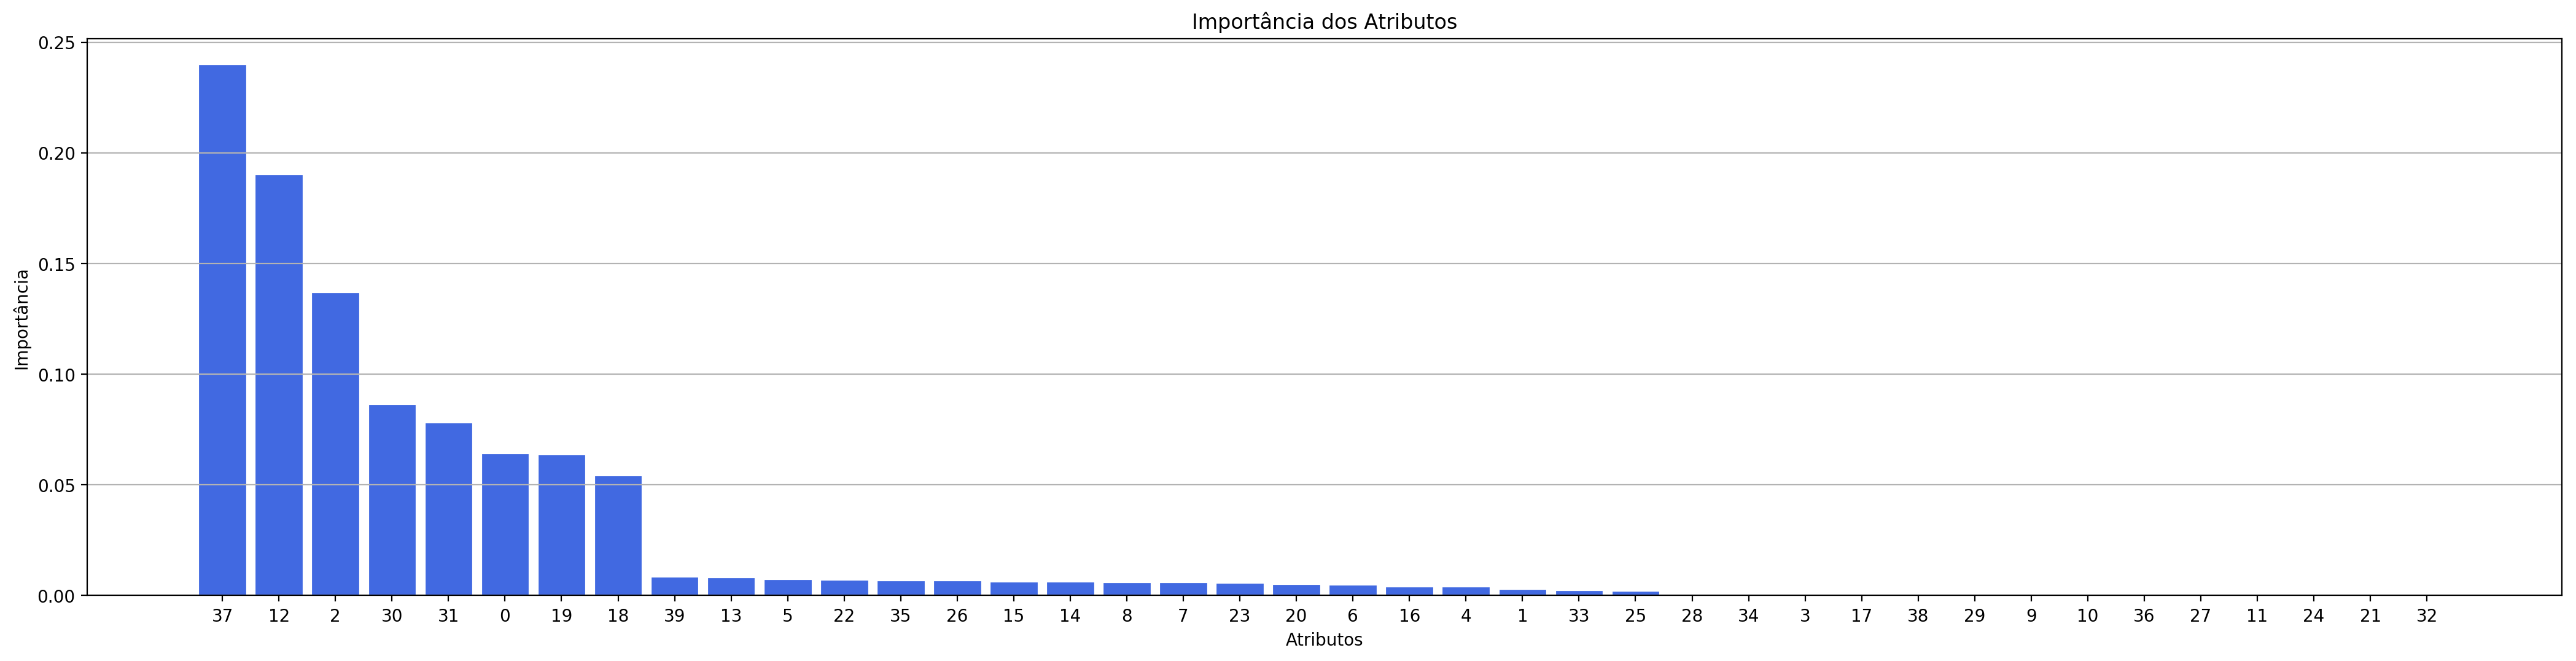

In [12]:
importances = cls_rf.feature_importances_
indices =  np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(26, 6), dpi=200)
plt.title(u"Importância dos Atributos")
plt.grid(b=True, which='both', color='0.7',linestyle='-', axis='y')
plt.xticks(range(len(indices)), indices)
plt.bar(range(len(indices)), importances[indices], color="#4169E1", align="center",edgecolor="#4169E1")
plt.xlabel(u"Atributos")
plt.ylabel(u"Importância")
plt.show()

In [13]:
colunas = list(new_df.columns.values)
for i in indices[:20]:
    print i, colunas[i]

37 amount_applied0
12 payment_actual0
2 delta_time
30 avg_event_interval
31 area
0 penalty_amount0
19 tot_events
18 number_parcels
39 young farmer
13 penalty_ABP
5 redistribution
22 penalty_AGP
35 cross_compliance
26 penalty_BGP
15 penalty_B2
14 penalty_B5
8 small farmer
7 selected_random
23 penalty_BGK
20 penalty_AUVP
